* Can we use a generative framework in order to assist us in our process of designing new circuits?
    + In this notebook we'll play with `autoencoders` to get a better feel for how they can work

In [ ]:
#| echo: false
from data import *
from utils import *
from model import *

In [ ]:
#| echo: false
plt.style.use('dark_background')

In [ ]:
#| echo: false
#| output: false
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_df = get_mnist_df()
valid_df = get_mnist_df(train=False)
train_dl, valid_dl = get_dls(train_df, valid_df, bs=64)
dls = DataLoaders(train_dl, valid_dl)
dls = dls.to(device)
train_df.shape, valid_df.shape, len(train_dl), len(valid_dl)

((60000, 2), (10000, 2), 938, 79)

## Dataset

* Our dataset is MNIST
    + A selection of ~70,000 handwritten digits -- a few sampels can be seen below:

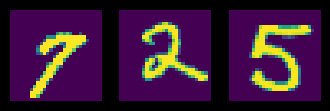

In [ ]:
#| echo: true
plot_dataset(train_df, num_samples=3)

In [ ]:
#| echo: false
model = Autoencoder().to('cuda')
learner = get_learner(dls, model, device=device)

## Model

* We'll be using an incredibly simple model for this task
    + Both the encoder & decoder feature have the same structure (encoder shown below)
      - Three convolutional layers with a single linear layer (660 MB RAM TOTAL) <br>

In [ ]:
#| echo: true
learner.model.encoder

Encoder(
  (conv_body): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(28, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Flatten(start_dim=1, end_dim=-1)
  )
)

In [ ]:
learner._backward??

Signature: learner._backward()
Docstring: <no docstring>
Source:        def _backward(self): self.loss_grad.backward(retain_graph=True)
File:      ~/Desktop/fastai/fastai/fastai/learner.py
Type:      method


### Quick training loop
* This takes <1 minute with a single GPU vs 4 min on macbook

In [ ]:
#| echo: true
learner.fine_tune(3, 3e-2)

epoch,train_loss,valid_loss,time
0,5195.427734,5154.079590,00:12


epoch,train_loss,valid_loss,time
0,4185.540527,4123.602539,00:10
1,3286.630859,3293.783447,00:10
2,3081.710693,3117.803467,00:10


## Reconstructed Images

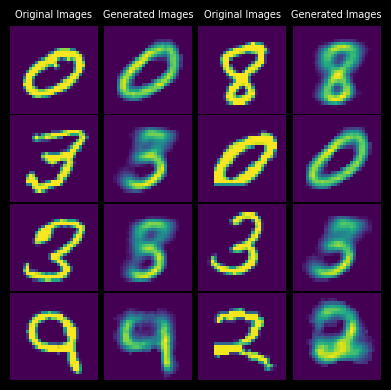

In [ ]:
#| echo: false
plt_subs(*get_valid_results(learner.model, dls.train), size=2)

## Latent space exploration

* Lets see how our validation set gets mapped into embedding space via our encoder
    + the model is able to map each number into it's own subspace -- some overlap considerably more than others

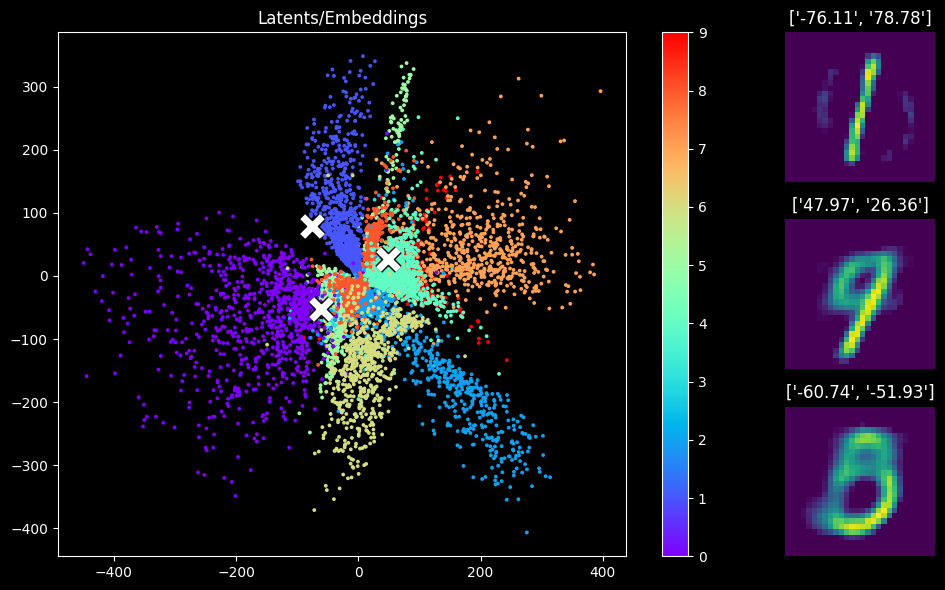

In [ ]:
#| fig-cap: "Figure 2: Embedding Space and Latent Reconstructions"
#| fig-subcap:
#|   - "left: embedding scatter plot <br> right: reconstructed latents"
plot_latent_regen(learner.model, min=-100, max=100)